In [1]:
import pandas as pd

# Load the dataset
dataset_path = r"C:\Users\madas\OneDrive\Desktop\model3\session1\dataset.csv"
df = pd.read_csv(dataset_path)

# Display the first few rows
df.head()


,filename,label,disease,height,width,avg_contour_length,line_density,num_lines
0,00001.tiff,1,Down Syndrome - Heart Defects and Immune Issues,600.0,800.0,38.905156,0.000004,2.0
1,00002.tiff,2,"Neurological Disorders - Autism, Schizophrenia",600.0,800.0,33.543912,0.000006,3.0
2,00003.tiff,2,"Neurological Disorders - Autism, Schizophrenia",600.0,800.0,36.164778,0.000004,2.0
3,00004.tiff,1,Down Syndrome - Heart Defects and Immune Issues,600.0,800.0,37.822817,0.000004,2.0
4,00005.tiff,1,Down Syndrome - Heart Defects and Immune Issues,600.0,800.0,36.780124,0.000004,2.0


In [4]:
import os
import cv2
import numpy as np
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Define image directory
image_dir = r"C:\Users\madas\OneDrive\Desktop\model3\session1"

# Image settings
IMG_SIZE = (128, 128)  # Resize all images to 128x128
data = []
labels = []

# Read images and labels from dataset
for index, row in df.iterrows():
    img_path = os.path.join(image_dir, row['filename'])  # Adjust column name if needed
    label = row['label']  # Adjust column name if needed
    
    # Read and preprocess image
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Convert to grayscale
    if img is not None:
        img = cv2.resize(img, IMG_SIZE)
        data.append(img)
        labels.append(label)

# Convert to numpy arrays
data = np.array(data) / 255.0  # Normalize pixel values
data = data.reshape(-1, 128, 128, 1)  # Add channel dimension
labels = to_categorical(labels)  # Convert labels to one-hot encoding

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

print(f"Dataset Loaded: {len(X_train)} train samples, {len(X_test)} test samples")


Dataset Loaded: 4800 train samples, 1200 test samples


In [7]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Build CNN model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(128,128,1)),
    MaxPooling2D(2,2),
    
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(labels.shape[1], activation='softmax')  # Corrected
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

# Save the model
model.save("palm_disease_model.h5")


Epoch 1/20
150/150 [==============================] - 52s 333ms/step - loss: 1.0723 - accuracy: 0.4821 - val_loss: 0.7942 - val_accuracy: 0.6400
Epoch 2/20
150/150 [==============================] - 55s 370ms/step - loss: 0.8544 - accuracy: 0.6025 - val_loss: 0.7478 - val_accuracy: 0.6533
Epoch 3/20
150/150 [==============================] - 58s 385ms/step - loss: 0.7820 - accuracy: 0.6365 - val_loss: 0.6720 - val_accuracy: 0.7008
Epoch 4/20
150/150 [==============================] - 58s 387ms/step - loss: 0.7451 - accuracy: 0.6615 - val_loss: 0.6412 - val_accuracy: 0.7108
Epoch 5/20
150/150 [==============================] - 57s 383ms/step - loss: 0.6906 - accuracy: 0.6948 - val_loss: 0.6456 - val_accuracy: 0.7133
Epoch 6/20
150/150 [==============================] - 58s 384ms/step - loss: 0.6736 - accuracy: 0.7000 - val_loss: 0.6266 - val_accuracy: 0.7250
Epoch 7/20
150/150 [==============================] - 58s 385ms/step - loss: 0.6351 - accuracy: 0.7225 - val_loss: 0.6622 - val_ac

C:\Users\madas\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [6]:
print(type(labels))  # Check if it's a NumPy array
print(labels.shape)  # Check its dimensions


<class 'numpy.ndarray'>
(6000, 5)


In [11]:
# Define class labels based on your dataset
CLASS_NAMES = ["Hypertension, Cardiovascular Disease", "Down Syndrome - Heart Defects and Immune Issues", "Neurological Disorders - Autism, Schizophrenia", "Scleroderma - Tissue Disorder", "Healthy"]  # Update these with actual disease names

def predict_image(img_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img = cv2.resize(img, (128, 128)) / 255.0  # Normalize pixel values
    img = img.reshape(1, 128, 128, 1)

    prediction = model.predict(img)
    predicted_label = np.argmax(prediction)  # Get the index of the highest probability

    print(f"Raw prediction output: {prediction}")  # Debugging step
    print(f"Predicted class index: {predicted_label}")  # Debugging step

    return CLASS_NAMES[predicted_label]  # ✅ Returns the actual disease name

# Example usage
image_path = r"C:\Users\madas\OneDrive\Desktop\model3\session1\00004.tiff"
print(f"Predicted Disease: {predict_image(image_path)}")


1/1 [==============================] - 0s 21ms/step
Raw prediction output: [[3.6716517e-03 9.9608397e-01 2.2579699e-04 3.2284784e-06 1.5355159e-05]]
Predicted class index: 1
Predicted Disease: Down Syndrome - Heart Defects and Immune Issues


In [12]:
prediction = model.predict(img)
print(f"Raw prediction output: {prediction}")
print(f"Predicted class index: {np.argmax(prediction)}")


ValueError: in user code:

    File "C:\Users\madas\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2416, in predict_function  *
        return step_function(self, iterator)
    File "C:\Users\madas\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2401, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\madas\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2389, in run_step  **
        outputs = model.predict_step(data)
    File "C:\Users\madas\anaconda3\Lib\site-packages\keras\src\engine\training.py", line 2357, in predict_step
        return self(x, training=False)
    File "C:\Users\madas\anaconda3\Lib\site-packages\keras\src\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\madas\anaconda3\Lib\site-packages\keras\src\engine\input_spec.py", line 253, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential' (type Sequential).
    
    Input 0 of layer "conv2d_3" is incompatible with the layer: expected min_ndim=4, found ndim=2. Full shape received: (32, 128)
    
    Call arguments received by layer 'sequential' (type Sequential):
      • inputs=tf.Tensor(shape=(32, 128), dtype=uint8)
      • training=False
      • mask=None


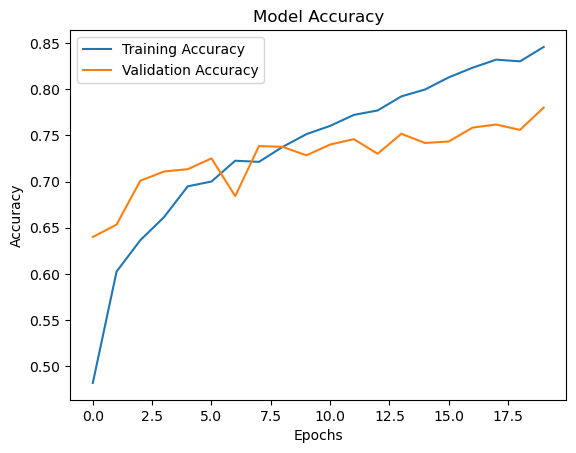

In [13]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


In [15]:
train_acc = max(history.history['accuracy'])
val_acc = max(history.history['val_accuracy'])

print(f"Max Training Accuracy: {train_acc * 100:.2f}%")
print(f"Max Validation Accuracy: {val_acc * 100:.2f}%")


Max Training Accuracy: 84.56%
Max Validation Accuracy: 78.00%


In [16]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)


X_train shape: (4800, 128, 128, 1)
y_train shape: (4800, 5)


1/1 [==============================] - 0s 81ms/step


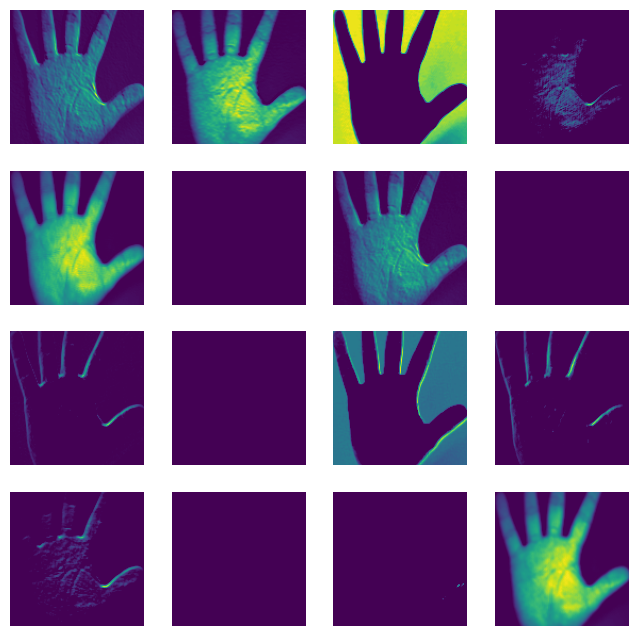

In [17]:
from tensorflow.keras.models import Model
import numpy as np

layer_outputs = [layer.output for layer in model.layers[:4]]  # Get first 4 layers
activation_model = Model(inputs=model.input, outputs=layer_outputs)

# Select a sample image
sample_img = np.expand_dims(X_train[0], axis=0)  # Add batch dimension

# Get activations
activations = activation_model.predict(sample_img)

# Plot first convolutional layer feature maps
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i in range(16):  
    ax = axes[i//4, i%4]
    ax.imshow(activations[0][0, :, :, i], cmap='viridis')
    ax.axis('off')
plt.show()


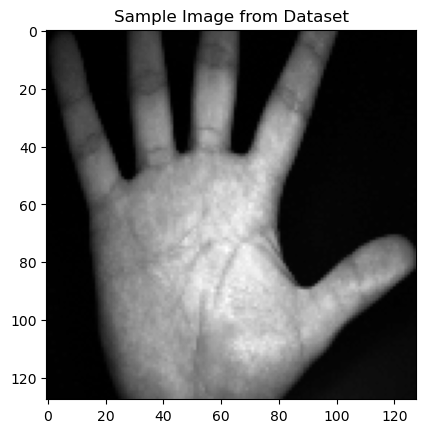

In [18]:
import matplotlib.pyplot as plt

plt.imshow(X_train[0].squeeze(), cmap='gray')  # Visualizing first image
plt.title("Sample Image from Dataset")
plt.show()


1/1 [==============================] - 0s 84ms/step


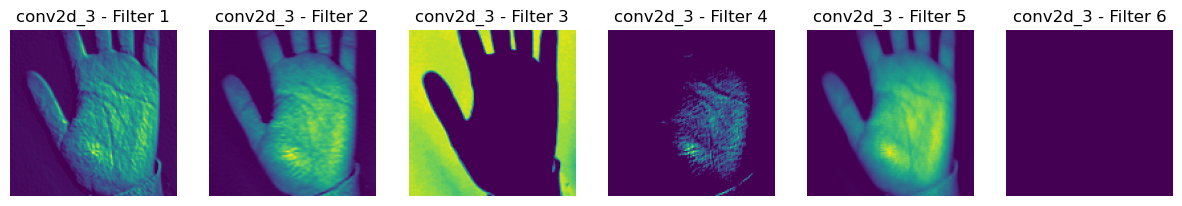

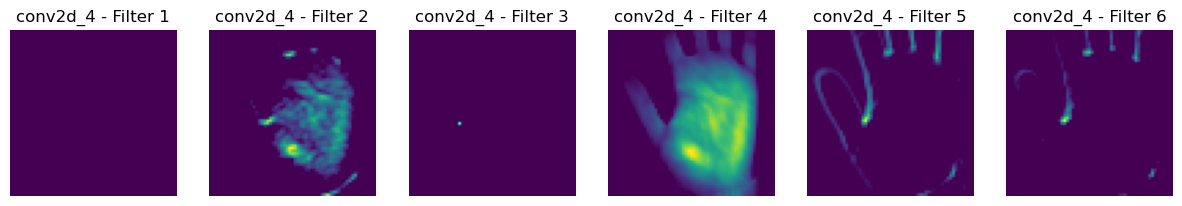

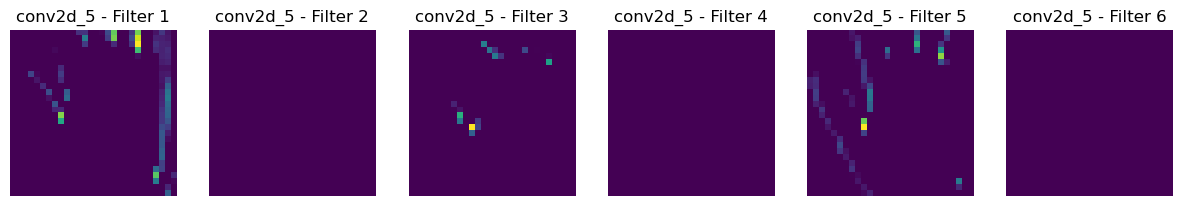

In [19]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Load trained model
model = tf.keras.models.load_model("palm_disease_model.h5")

# Select an image from test set (use any sample from X_test)
sample_image = np.expand_dims(X_test[0], axis=0)  # Add batch dimension

# Get the outputs of convolutional layers
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
feature_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Generate feature maps
feature_maps = feature_model.predict(sample_image)

# Plot feature maps for the first convolutional layer
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]

for layer_name, fmap in zip(layer_names, feature_maps):
    n_filters = fmap.shape[-1]  # Number of filters in the layer
    fig, axes = plt.subplots(1, min(n_filters, 6), figsize=(15, 5))

    for i in range(min(n_filters, 6)):  # Show first 6 feature maps
        axes[i].imshow(fmap[0, :, :, i], cmap='viridis')
        axes[i].axis('off')
        axes[i].set_title(f"{layer_name} - Filter {i+1}")

    plt.show()


In [20]:
import tensorflow as tf
import numpy as np

# Load trained model
model = tf.keras.models.load_model("palm_disease_model.h5")

# Select an image from test set (use any sample from X_test)
sample_image = np.expand_dims(X_test[0], axis=0)  # Add batch dimension

# Get the outputs of convolutional layers
layer_outputs = [layer.output for layer in model.layers if 'conv' in layer.name]
feature_model = tf.keras.models.Model(inputs=model.input, outputs=layer_outputs)

# Generate feature maps
feature_maps = feature_model.predict(sample_image)

# Print feature maps in text format
layer_names = [layer.name for layer in model.layers if 'conv' in layer.name]

for layer_name, fmap in zip(layer_names, feature_maps):
    print(f"\n--- Feature Maps from Layer: {layer_name} ---")
    fmap = fmap[0]  # Remove batch dimension
    for i in range(min(fmap.shape[-1], 6)):  # Show first 6 filters
        print(f"Filter {i+1} Feature Map:\n", fmap[:, :, i])


1/1 [==============================] - 0s 78ms/step

--- Feature Maps from Layer: conv2d_3 ---
Filter 1 Feature Map:
 [[0.00100824 0.00166796 0.00224036 ... 0.00194477 0.00279268 0.00164309]
 [0.00194642 0.00209162 0.00221259 ... 0.00083818 0.00147455 0.0022556 ]
 [0.00104689 0.00165795 0.00192075 ... 0.00122465 0.00181734 0.00177703]
 ...
 [0.00209685 0.00263522 0.0022934  ... 0.00028506 0.00184992 0.00171895]
 [0.00142147 0.00208118 0.00259927 ... 0.00101178 0.00174463 0.00196841]
 [0.00171264 0.00160697 0.002349   ... 0.0008033  0.00217652 0.00241538]]
Filter 2 Feature Map:
 [[3.5668630e-04 2.1912251e-04 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 8.9995470e-04]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.2089919e-03
  2.1822629e-03 1.1031823e-03]
 [6.6171493e-04 4.8683863e-04 5.2840915e-04 ... 1.1131903e-03
  6.1192829e-04 8.9416280e-06]
 ...
 [6.8192836e-04 7.0024747e-04 6.9876295e-04 ... 3.2331990e-03
  4.2954786e-03 4.2642439e-03]
 [1.6441019e-03 1.5065344e-03 1.546210